<html>
<table width="100%" cellspacing="2" cellpadding="2" border="1">
<tbody>
<tr>
<td valign="center" align="center" width="45%"><img src="../media/Univ-Utah.jpeg"><br>
</td>
    <td valign="center" align="center" width="75%">
<h1 align="center"><font size="+1">University of Utah<br>Population Health Sciences<br>Data Science Workshop</font></h1></td>
<td valign="center" align="center" width="45%"><img
src="../media/U_Health_stacked_png_red.png" alt="Utah Health
Logo" width="128" height="134"><br>
</td>
</tr>
</tbody>
</table>
<br>
</html>


In [1]:
import pandas as pd
from util import connect_to_mimic

In [2]:
conn = connect_to_mimic("uu-phs")

Enter password for MIMIC2 database········


# Analyzing MIMIC data


Our first task will be to do some analyses of the demographic data we saw in the earlier notebooks. Then we'll move on to other domains.

In [6]:
import seaborn as sns
sns.set()

In [10]:
query = """
SELECT 
    ethnicity_descr,
    COUNT(1) n,
    MIN(DATEDIFF(dod, dob)/365) min_age_at_death,
    MAX(DATEDIFF(dod, dob)/365) min_age_at_death,
    AVG(DATEDIFF(dod, dob)/365) mean_age_at_death,
    STD(DATEDIFF(dod, dob)/365) sd_age_at_death
FROM d_patients p
    INNER JOIN demographic_detail d
        ON p.subject_id = d.subject_id
GROUP BY ethnicity_descr
ORDER BY COUNT(1) desc
"""
ethnicity = pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


<AxesSubplot:xlabel='n', ylabel='ethnicity_descr'>

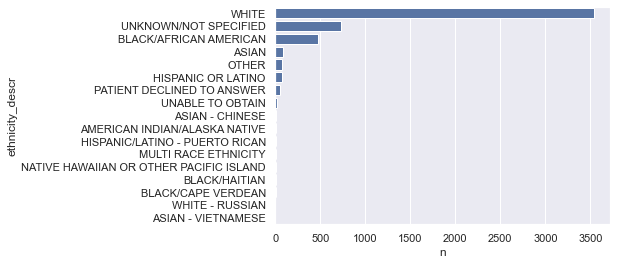

In [11]:
sns.barplot(y="ethnicity_descr", x="n", data=ethnicity, color="C0")

<AxesSubplot:xlabel='mean_age_at_death', ylabel='ethnicity_descr'>

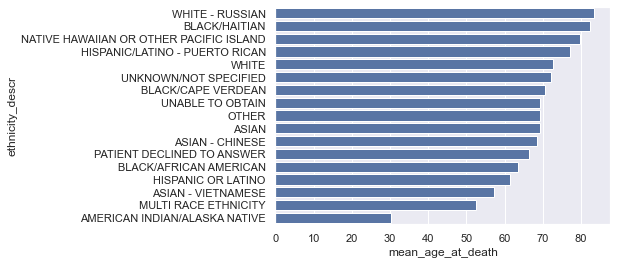

In [17]:
sns.barplot(y="ethnicity_descr", x="mean_age_at_death", data=ethnicity.sort_values("mean_age_at_death", ascending=False), color="C0")

In [21]:
query = """
SELECT 
    d.subject_id,
    d.ethnicity_descr,
    p.sex,
    DATEDIFF(dod, dob)/365 age_at_death
    
FROM d_patients p
    INNER JOIN demographic_detail d
        ON p.subject_id = d.subject_id
"""
demographics = pd.read_sql(query, conn)

In [22]:
demographics.head()

,subject_id,ethnicity_descr,sex,age_at_death
0,56,WHITE,F,90.7205
1,37,WHITE,M,70.3534
2,78,BLACK/AFRICAN AMERICAN,M,51.6247
3,67,WHITE,M,73.5397
4,3,WHITE,M,77.2247


<AxesSubplot:xlabel='age_at_death', ylabel='ethnicity_descr'>

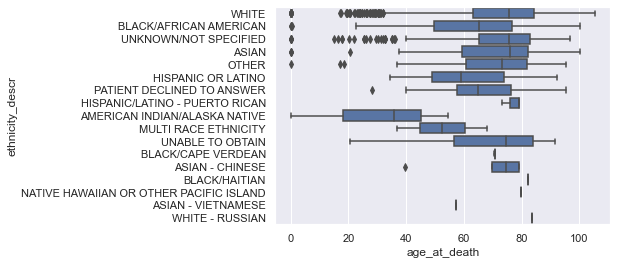

In [26]:
sns.boxplot(y="ethnicity_descr", x="age_at_death", data=demographics, color="C0")

<AxesSubplot:xlabel='sex', ylabel='age_at_death'>

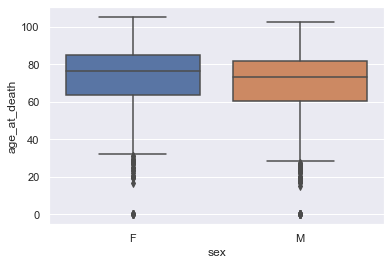

In [28]:
sns.boxplot(x="sex", y="age_at_death", data=demographics)

### COUNT

In [3]:
query = """
SELECT COUNT(1)
FROM admissions
"""
pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,COUNT(1)
0,5074


#### TODO
Write a query to get the number of admissions from the ED.

In [7]:
query = """
SELECT COUNT(1)
FROM demographic_detail 
WHERE admission_source_descr = 'EMERGENCY ROOM ADMIT'
"""
pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,COUNT(1)
0,3193


## Mins, Maxes, and Means

In [16]:
query = """
SELECT 
    MIN(dob) earliest_birth, MAX(dob) latest_birth, MIN(dod) earliest_death, MAX(dod) latest_death
FROM d_patients p
"""
pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,earliest_birth,latest_birth,earliest_death,latest_death
0,2405-06-25 00:00:00,3498-02-04 00:00:00,2501-04-08 00:00:00,3586-01-08 00:00:00


In [17]:
query = """
SELECT 
    MIN(DATEDIFF(dod, dob)/365) min_age_at_death,
    MAX(DATEDIFF(dod, dob)/365) min_age_at_death
FROM d_patients p
"""
pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,min_age_at_death,min_age_at_death
0,0.0,105.4219


In [23]:
query = """
SELECT 
    MIN(DATEDIFF(dod, dob)/365) min_age_at_death,
    MAX(DATEDIFF(dod, dob)/365) min_age_at_death,
    AVG(DATEDIFF(dod, dob)/365) mean_age_at_death,
    STD(DATEDIFF(dod, dob)/365) sd_age_at_death
FROM d_patients p
"""
pd.read_sql(query, conn)

,min_age_at_death,min_age_at_death,mean_age_at_death,sd_age_at_death
0,0.0,105.4219,72.202496,16.276323


## GROUP BY
The queries above gave us the *total* counts in MIMIC. But we might want to break our statistics up into groups. We'll use the `GROUP BY` clause for that. 

The `GROUP BY` clause tells us which column to use for breaking our patients up into groups.

In [24]:
query = """
SELECT sex, COUNT(1) n
FROM d_patients 
GROUP BY sex
"""
pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,sex,n
0,None,13
1,F,1856
2,M,2131


#### TODO

In [25]:
query = """
SELECT admission_source_descr, COUNT(1)
FROM demographic_detail 
GROUP BY admission_source_descr
"""
pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,admission_source_descr,COUNT(1)
0,** INFO NOT AVAILABLE **,4
1,CLINIC REFERRAL/PREMATURE,211
2,EMERGENCY ROOM ADMIT,3193
3,HMO REFERRAL/SICK,1
4,PHYS REFERRAL/NORMAL DELI,616
5,TRANSFER FROM HOSP/EXTRAM,957
6,TRANSFER FROM OTHER HEALT,13
7,TRANSFER FROM SKILLED NUR,79


### TODO
Calculate the count *and* aggregate statistics for age of death based on `ethnicity_descr`.

In [31]:
query = """
SELECT 
    ethnicity_descr,
    COUNT(1) n,
    MIN(DATEDIFF(dod, dob)/365) min_age_at_death,
    MAX(DATEDIFF(dod, dob)/365) min_age_at_death,
    AVG(DATEDIFF(dod, dob)/365) mean_age_at_death,
    STD(DATEDIFF(dod, dob)/365) sd_age_at_death
FROM d_patients p
    INNER JOIN demographic_detail d
        ON p.subject_id = d.subject_id
GROUP BY ethnicity_descr
"""
pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ethnicity_descr,n,min_age_at_death,min_age_at_death,mean_age_at_death,sd_age_at_death
0,AMERICAN INDIAN/ALASKA NATIVE,3,0.0411,54.5068,30.156133,22.606056
1,ASIAN,86,0.0603,100.3890,69.176678,20.173166
2,ASIAN - CHINESE,5,39.7479,79.2712,68.517240,14.810103
3,ASIAN - VIETNAMESE,1,57.3205,57.3205,57.320500,0.000000
4,BLACK/AFRICAN AMERICAN,474,0.0027,100.1589,63.558630,17.670570
5,BLACK/CAPE VERDEAN,2,70.6055,70.7205,70.663000,0.057534
6,BLACK/HAITIAN,2,82.4000,82.4000,82.400000,0.000000
7,HISPANIC OR LATINO,71,34.4822,92.4192,61.434151,14.010629
8,HISPANIC/LATINO - PUERTO RICAN,3,73.1397,79.0110,77.053900,2.767726
9,MULTI RACE ETHNICITY,2,36.9014,68.1918,52.546600,15.645205
